## Cells Dataset Data Augmentation
---
Applying data augmentation on the cells dataset.

### Setup

In [1]:
# Imports
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

In [3]:
# Constants
CROP_SIZE = 400
ORIGINAL_FOLDER = './CellsDataset/original'
LABEL_FOLDER = './CellsDataset/labels'
SEGMENTED_FOLDER = './CellsDataset/segmented'
CROPPED_OUTPUT_PATH = './AugmentedCellsDataset/crop'

In [4]:
def create_folder(folder_path):
    '''Creates a folder if does not exists.'''
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

In [5]:
def visualize(figsize=(15, 15),**images):
    """Plots images in one row."""
    n = len(images)
    plt.figure(figsize=figsize)
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

### Crop
The original images have a size of 2048x1532, that can be devided into smaller images of size 400X400.

In [6]:
def crop_image(img, crop_size, left, top):
    '''crops the image in the defined size'''
    right = left +  crop_size
    bottom =  top + crop_size
    cropped = img.crop((left, top, right, bottom))
    return cropped

In [7]:
# Obtaining the images
filenames = os.listdir(ORIGINAL_FOLDER)
original_imgs = [Image.open(f'{ORIGINAL_FOLDER}/{filename}') for filename in filenames]
label_imgs = [Image.open(f'{LABEL_FOLDER}/{filename}') for filename in filenames]
segmented_imgs = [Image.open(f'{SEGMENTED_FOLDER}/{filename}') for filename in filenames]

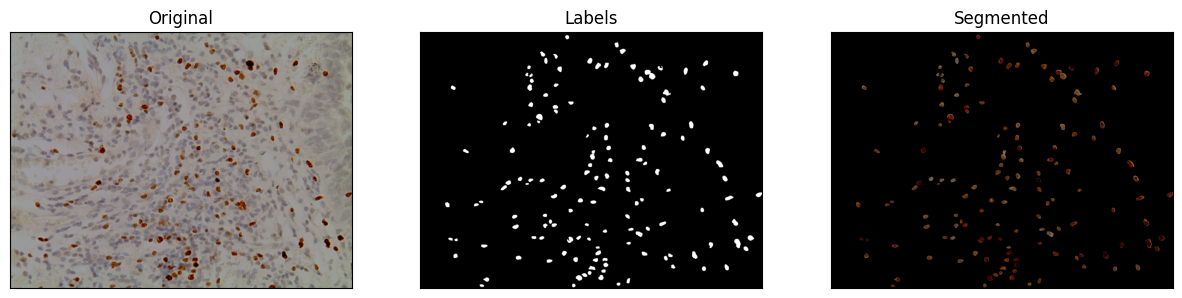

(2048, 1532)
(2048, 1532)
(2048, 1532)


In [8]:
visualize(original=original_imgs[0], labels=label_imgs[0], segmented=segmented_imgs[0])
print(original_imgs[0].size)
print(label_imgs[0].size)
print(segmented_imgs[0].size)

In [9]:
width = original_imgs[0].size[0]
height = original_imgs[0].size[1]
cropped_originals = []
cropped_labels = []
cropped_segmented = []

In [10]:
# Cropping each image
w_acc = 0
while w_acc <= width:
    h_acc = 0
    while h_acc <= height:
        for i in range(len(original_imgs)):
            cropped_originals.append(crop_image(original_imgs[i], CROP_SIZE, w_acc, h_acc))
            cropped_labels.append(crop_image(label_imgs[i], CROP_SIZE, w_acc, h_acc))
            cropped_segmented.append(crop_image(segmented_imgs[i], CROP_SIZE, w_acc, h_acc))
        h_acc += CROP_SIZE
    w_acc += CROP_SIZE

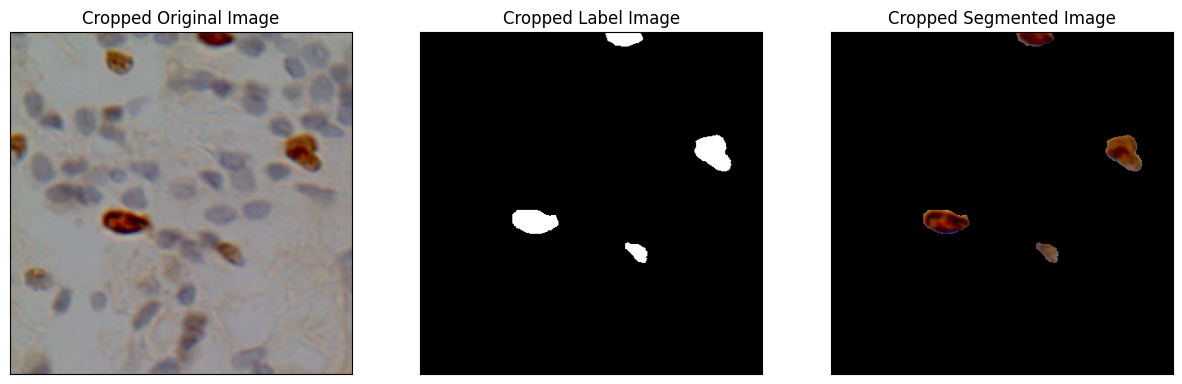

Created 240 new images


In [11]:
visualize(cropped_original_image = cropped_originals[8], cropped_label_image=cropped_labels[8], cropped_segmented_image = cropped_segmented[8])
print(f'Created {len(cropped_originals)} new images')


In [12]:
create_folder(f'{CROPPED_OUTPUT_PATH}/original')
create_folder(f'{CROPPED_OUTPUT_PATH}/labels')
create_folder(f'{CROPPED_OUTPUT_PATH}/segmented')

In [13]:
# Saving the results
for i in range(len(cropped_originals)):
    cropped_originals[i].save(f'{CROPPED_OUTPUT_PATH}/original/{i+1}.png')
    cropped_labels[i].save(f'{CROPPED_OUTPUT_PATH}/labels/{i+1}.png')
    cropped_segmented[i].save(f'{CROPPED_OUTPUT_PATH}/segmented/{i+1}.png')